In [3]:
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import checkpoint
import torch.nn.utils.prune as prune
from torchvision import transforms

from dataset import MNIST_Dataset, CIFAR10_Dataset
from prune_fns import prune_model
from train import train, train_kd, test
import models

In [4]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
resnet18 = models.load_resnet18(num_out_class=10, device=device, pretrained=False)

opt = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=200)
scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, [90, 136])
config = {
    'num_epoch' : 180,
    'lr' : 0.001,
    'beta1' : 0.9,
    'batch_size' : 128,
    'ckpt_path' : 'checkpoints/pruning_test/resnet18_0/',
    'device' : device,
    'val_freq' : 1000,
    'opt' : opt,
    'scheduler' : scheduler, 
    'crit' : nn.CrossEntropyLoss(),
}

In [5]:
dataset = CIFAR10_Dataset(config['batch_size'], dataset_path="./", device=config['device'], val=5000)

In [6]:
def conv_modules(resnet18):
    conv_modules = list()
    conv_modules.append((resnet18.conv1, "weight"))

    for m in (resnet18.layer1, resnet18.layer2, resnet18.layer3, resnet18.layer4):
        for i in range(2):
            conv_modules.append((m[i].conv1, "weight"))
            conv_modules.append((m[i].conv2, "weight"))
            
    return conv_modules

In [9]:
results = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

Which epoch to load from? Choose from epochs below:
[0, 1, 2, 3, 4, 5, 90, 136, 180]
Enter 0 to train from scratch.
>> 

KeyboardInterrupt: Interrupted by user

In [ ]:
current_conv_modules = conv_modules(resnet18)

In [ ]:
prune_model(resnet18, 0.2, current_conv_modules, device)

In [ ]:
opt = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=200)
scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, [90, 136])
config = {
    'num_epoch' : 180,
    'lr' : 0.001,
    'beta1' : 0.9,
    'batch_size' : 128,
    'ckpt_path' : 'checkpoints/pruning_test/resnet18_2/',
    'device' : device,
    'val_freq' : 1000,
    'opt' : opt,
    'scheduler' : scheduler, 
}

In [ ]:
results2 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

In [ ]:
current_conv_modules = conv_modules(resnet18)
prune_model(resnet18, 0.2, current_conv_modules, device)

In [ ]:
opt = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=200)
scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, [90, 136])
config['opt'] = opt
config['scheduler'] = scheduler
config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_3/'
results2 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

In [ ]:
current_conv_modules = conv_modules(resnet18)
prune_model(resnet18, 0.2, current_conv_modules, device)

In [ ]:
opt = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=200)
scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, [90, 136])
config['opt'] = opt
config['scheduler'] = scheduler
config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_4/'
results2 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

In [ ]:
current_conv_modules = conv_modules(resnet18)
prune_model(resnet18, 0.2, current_conv_modules, device)

In [ ]:
opt = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=200)
scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, [90, 136])
config['opt'] = opt
config['scheduler'] = scheduler
config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_6/'
results2 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

In [ ]:
current_conv_modules = conv_modules(resnet18)
prune_model(resnet18, 0.2, current_conv_modules, device)
opt = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=200)
scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, [90, 136])
config['opt'] = opt
config['scheduler'] = scheduler
config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_7/'
results2 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

In [ ]:
current_conv_modules = conv_modules(resnet18)
prune_model(resnet18, 0.2, current_conv_modules, device)
opt = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=200)
scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, [90, 136])
config['opt'] = opt
config['scheduler'] = scheduler
config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_8/'
results2 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

In [ ]:
current_conv_modules = conv_modules(resnet18)
prune_model(resnet18, 0.2, current_conv_modules, device)
opt = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
#scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=200)
scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, [90, 136])
config['opt'] = opt
config['scheduler'] = scheduler
config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_8/'
results2 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

In [7]:
# Load saved checkpoints and get test data
results0 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

models.checkpoint_weights(resnet18, conv_modules)
prune_model(resnet18, 0.0, conv_modules, device)

config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_1'
results1 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_2'
results2 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_3'
results3 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_4'
results4 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_5'
results5 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_6'
results6 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

config['ckpt_path'] = 'checkpoints/pruning_test/resnet18_7'
results7 = train(config, dataset, resnet18, save_weights_iter=500, params_to_save=conv_modules)

Which epoch to load from? Choose from epochs below:
[0, 1, 2, 3, 4, 5, 90, 136, 180]
Enter 0 to train from scratch.
>> 

 180


Loading from checkpoint checkpoints/pruning_test/resnet18_0/epoch=180.checkpoint.pth.tar
=> Successfully restored checkpoint (trained for 180 epochs)
Which epoch to load from? Choose from epochs below:
[0, 1, 90, 136, 180]
Enter 0 to train from scratch.
>> 

 180


Loading from checkpoint checkpoints/pruning_test/resnet18_1\epoch=180.checkpoint.pth.tar
=> Successfully restored checkpoint (trained for 180 epochs)
Which epoch to load from? Choose from epochs below:
[0, 1, 90, 136, 180]
Enter 0 to train from scratch.
>> 

 180


Loading from checkpoint checkpoints/pruning_test/resnet18_2\epoch=180.checkpoint.pth.tar
=> Successfully restored checkpoint (trained for 180 epochs)
Which epoch to load from? Choose from epochs below:
[0, 1, 90, 136, 180]
Enter 0 to train from scratch.
>> 

 180


Loading from checkpoint checkpoints/pruning_test/resnet18_3\epoch=180.checkpoint.pth.tar
=> Successfully restored checkpoint (trained for 180 epochs)
Which epoch to load from? Choose from epochs below:
[0, 1, 90, 136, 180]
Enter 0 to train from scratch.
>> 

 180


Loading from checkpoint checkpoints/pruning_test/resnet18_4\epoch=180.checkpoint.pth.tar
=> Successfully restored checkpoint (trained for 180 epochs)
Which epoch to load from? Choose from epochs below:
[0, 1, 90, 136, 180]
Enter 0 to train from scratch.
>> 

 180


Loading from checkpoint checkpoints/pruning_test/resnet18_5\epoch=180.checkpoint.pth.tar
=> Successfully restored checkpoint (trained for 180 epochs)
Which epoch to load from? Choose from epochs below:
[0, 1, 90, 136, 180]
Enter 0 to train from scratch.
>> 

 180


Loading from checkpoint checkpoints/pruning_test/resnet18_6\epoch=180.checkpoint.pth.tar
=> Successfully restored checkpoint (trained for 180 epochs)
Which epoch to load from? Choose from epochs below:
[0, 1, 90, 136, 180]
Enter 0 to train from scratch.
>> 

 180


Loading from checkpoint checkpoints/pruning_test/resnet18_7\epoch=180.checkpoint.pth.tar
=> Successfully restored checkpoint (trained for 180 epochs)


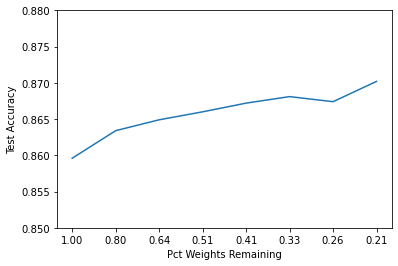

In [13]:
test_acc = [i[-2] for i in (results0, results1, results2, results3, results4, results5, results6, results7)]

import matplotlib.pyplot as plt
plt.plot(test_acc)
plt.ylim((0.85, 0.88))
plt.xlabel("Pct Weights Remaining")
plt.ylabel("Test Accuracy")
plt.xticks(ticks=range(8), labels=["{:.2f}".format(0.8**i) for i in range(8)])
plt.show()

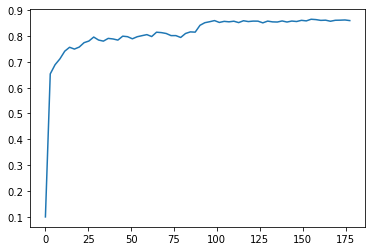

In [32]:
plt.plot([i / 355 for i in results1[3]], results1[2])

In [18]:
[i[2][29] for i in (results1, results2, results3, results4, results5, results6, results7)]

[0.81, 0.8102, 0.8048, 0.8056, 0.8104, 0.8186, 0.8076]